## 🔢 Parametric Fibonacci Sequences

In the classical Fibonacci sequence, we use fixed seeds $S_0 = 0$, $S_1 = 1$.

Elnamaki Coding generalizes this to arbitrary seed pairs $(x, y) \in \mathbb{Z}^2$.

We define the Parametric Fibonacci Sequence as:

$S_0 = x, \quad S_1 = y, \quad S_n = S_{n-1} + S_{n-2} \quad \forall n \geq 2$

Each seed pair defines a new recursive path through arithmetic space.

This lets us study how structure evolves as a function of initial momentum (the difference between $x$ and $y$).

Let’s implement it.

In [1]:
from typing import List, Tuple

def parametric_fibonacci(seed: Tuple[int, int], depth: int) -> List[int]:
    x, y = seed
    seq = [x, y]
    for _ in range(2, depth):
        seq.append(seq[-1] + seq[-2])
    return seq

# Example: (x=19, y=23), depth=10
S1 = parametric_fibonacci((19, 23), 10)
print("S(x=19, y=23) =", S1)


S(x=19, y=23) = [19, 23, 42, 65, 107, 172, 279, 451, 730, 1181]


## Seed Differential and Triadic Identity

The seed differential is defined as:

$\delta = y - x$

This defines a triadic system of identities:

$\begin{aligned}
y &= x + \delta \\
x &= y - \delta \\
\delta &= y - x
\end{aligned}$

These form a closed algebraic triangle that defines how the sequence "flows" from its origin.

Let’s compute them and compare alternate forms of sequences.

In [2]:
def triadic_bases(x: int, y: int, n: int):
    from sympy import fibonacci
    delta = y - x
    Fn = fibonacci(n)
    Fn_minus1 = fibonacci(n - 1)
    
    # Forms
    orig = x * Fn_minus1 + y * Fn
    form1 = x * fibonacci(n + 1) + delta * Fn
    form2 = y * fibonacci(n + 1) - delta * Fn_minus1
    
    return orig, form1, form2

x, y, n = 19, 23, 5
orig, f1, f2 = triadic_bases(x, y, n)
print(f"Original basis: {orig}, Alternate form1: {f1}, Alternate form2: {f2}")


Original basis: 172, Alternate form1: 172, Alternate form2: 172


## Cross-Seed Inference and Evolution
Given seed pairs:

$(x, y)$
$(0, x)$
$(x, \delta)$
We can observe structural fusion across sequences.

For example, if $S_1$ is from $(x, y)$, $S_2$ is from $(0, x)$, and $S_3$ is from $(x, \delta)$:

$S_1[n] = S_2[n] + S_3[n]$

This reveals inter-sequence dynamics: numbers are generated not only within sequences but also across them.

Let’s demonstrate this.

In [3]:
x, y = 19, 23
delta = y - x
depth = 10

S1 = parametric_fibonacci((x, y), depth)
S2 = parametric_fibonacci((0, x), depth)
S3 = parametric_fibonacci((x, delta), depth)

# Show the value at index 4
n = 4
print(f"S1[{n}] = {S1[n]}  |  S2[{n}] + S3[{n}] = {S2[n]} + {S3[n]} = {S2[n] + S3[n]}")


S1[4] = 107  |  S2[4] + S3[4] = 57 + 50 = 107


## Example for quantum

This lattice simulates a **quantum entanglement-like relationship** among additive arithmetic trajectories.  
- Each sequence can be viewed as a **quantum wire**
- Their **intersections** define a **shared number-space**
- Errors in one path can be corrected via others — like **redundant tensor channels**


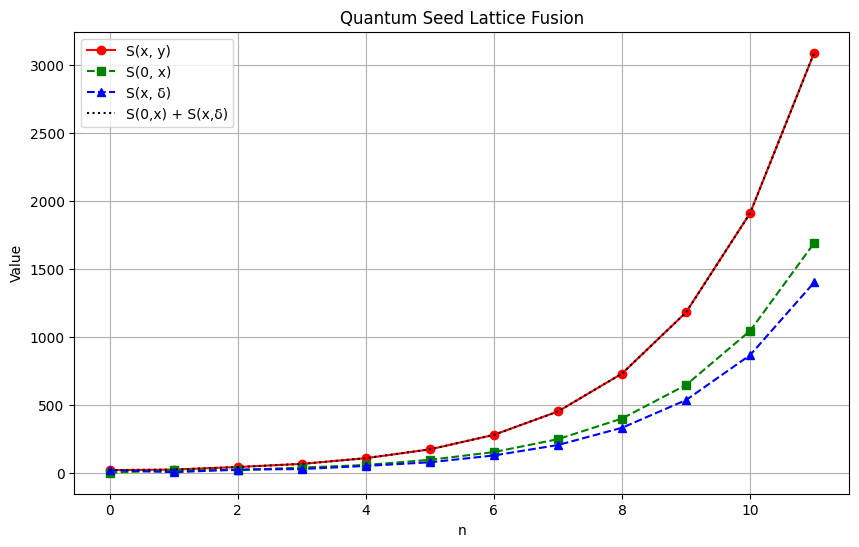

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def generate_multiple_sequences(x: int, y: int, depth: int):
    δ = y - x
    S_xy = parametric_fibonacci((x, y), depth)
    S_0x = parametric_fibonacci((0, x), depth)
    S_xδ = parametric_fibonacci((x, δ), depth)
    return S_xy, S_0x, S_xδ

def plot_quantum_lattice(S_xy, S_0x, S_xδ):
    n = len(S_xy)
    indices = np.arange(n)

    plt.figure(figsize=(10, 6))
    plt.plot(indices, S_xy, 'r-o', label='S(x, y)')
    plt.plot(indices, S_0x, 'g--s', label='S(0, x)')
    plt.plot(indices, S_xδ, 'b--^', label='S(x, δ)')
    plt.plot(indices, [a + b for a, b in zip(S_0x, S_xδ)], 'k:', label='S(0,x) + S(x,δ)')

    plt.title("Quantum Seed Lattice Fusion")
    plt.xlabel("n")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    plt.show()

# Example run
x, y = 19, 23
depth = 12
S_xy, S_0x, S_xδ = generate_multiple_sequences(x, y, depth)
plot_quantum_lattice(S_xy, S_0x, S_xδ)
